img.shape: (450, 375, 3)
img_rgv shape: (450, 375, 3)


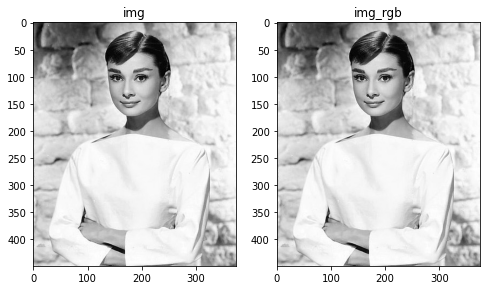

In [7]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### load audrey hepburn image and visualize with matplotlib ###
img = cv2.imread('../../data/image/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # RGB image
print('img.shape:', img.shape)
print('img_rgv shape:',img_rgb.shape)

plt.figure(figsize=(8,16))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('img')

plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.title('img_rgb')

plt.show()

In [8]:
# selectivesearch.selective_search() returns image's Region Proposal information
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 41


In [9]:
regions

[{'rect': (0, 0, 107, 167), 'size': 11166, 'labels': [0.0]},
 {'rect': (15, 0, 129, 110), 'size': 8771, 'labels': [1.0]},
 {'rect': (121, 0, 253, 133), 'size': 17442, 'labels': [2.0]},
 {'rect': (134, 17, 73, 62), 'size': 2713, 'labels': [3.0]},
 {'rect': (166, 23, 87, 176), 'size': 8639, 'labels': [4.0]},
 {'rect': (136, 53, 88, 121), 'size': 4617, 'labels': [5.0]},
 {'rect': (232, 79, 117, 147), 'size': 7701, 'labels': [6.0]},
 {'rect': (50, 91, 133, 123), 'size': 7042, 'labels': [7.0]},
 {'rect': (305, 97, 69, 283), 'size': 11373, 'labels': [8.0]},
 {'rect': (0, 161, 70, 46), 'size': 2363, 'labels': [9.0]},
 {'rect': (72, 171, 252, 222), 'size': 34467, 'labels': [10.0]},
 {'rect': (0, 181, 118, 85), 'size': 5270, 'labels': [11.0]},
 {'rect': (106, 210, 89, 101), 'size': 2868, 'labels': [12.0]},
 {'rect': (302, 228, 66, 96), 'size': 2531, 'labels': [13.0]},
 {'rect': (0, 253, 92, 134), 'size': 7207, 'labels': [14.0]},
 {'rect': (153, 270, 173, 179), 'size': 10360, 'labels': [15.0]},


In [10]:
# rect 
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


#### Bounding Box Visualization

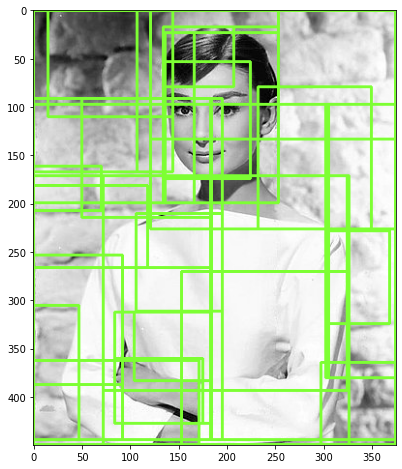

In [11]:
# using opencv rectangle()

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:
    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

#### Extract Only Large Bounding  Box

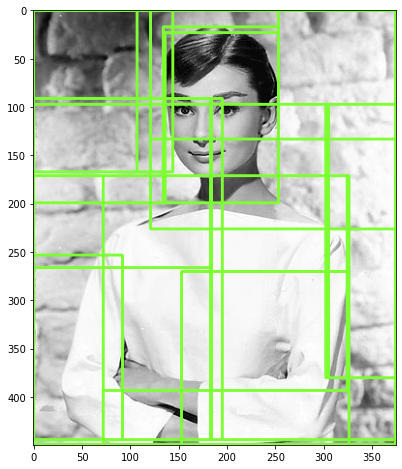

In [12]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:
    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

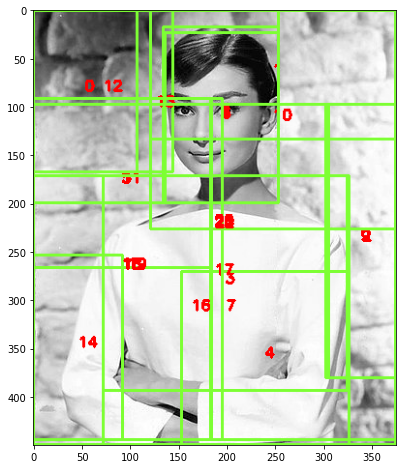

In [13]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for i, rect in enumerate(cand_rects):
    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    img_rgb_copy = cv2.putText(img_rgb_copy, str(i),(int((right+left)/2), int((bottom+top)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
    
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

## IOU 

calculate IOU with candidate boxes and final boxes 

In [14]:
import numpy as np

def compute_iou(cand_box, gt_box): # each box's [left, top, right, bottom]
    # Calculate intersection areas
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    
    intersection = np.maximum(x2-x1, 0) * np.maximum(y2-y1, 0)
    
    cand_box_area = (cand_box[2]-cand_box[0]) * (cand_box[3]-cand_box[1])
    gt_box_area = (gt_box[2]-gt_box[0]) * (gt_box[3]-gt_box[1])
    
    union = cand_box_area + gt_box_area - intersection
    
    iou = intersection / union
    
    return iou

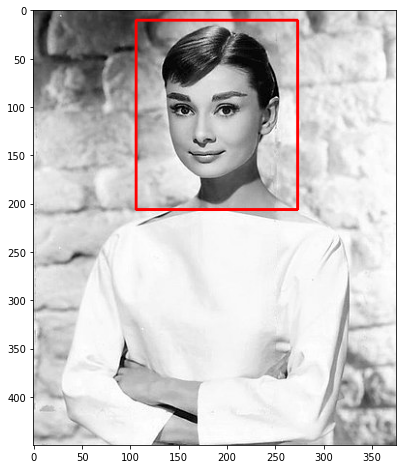

In [15]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('../../data/image/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.namedWindow('Select Window')
rect = cv2.selectROI('Select Window', img_rgb, fromCenter=False, showCrosshair=True)
cv2.destroyAllWindows()

left = rect[0]
top = rect[1]
right = left + rect[2]
bottom = top + rect[3]
    
# Ground Truth location
gt_box = [left, top, right, bottom]

img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), (255,0,0), 2)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

In [16]:
import selectivesearch

_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 45


In [17]:
cand_rects = [cand['rect'] for cand in regions]
for index, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1] # [left, top, right, bottom] 
    
    iou = compute_iou(cand_box, gt_box)
    print('index:', index, 'iou:', iou)

index: 0 iou: 0.10663764961915125
index: 1 iou: 0.12445839711491062
index: 2 iou: 0.5428192371475954
index: 3 iou: 0.9781842089534397
index: 4 iou: 0.2791038508017861
index: 5 iou: 0.9561285592081143
index: 6 iou: 0.5224245386777465
index: 7 iou: 0.1382744714652328
index: 8 iou: 0.47843089331541
index: 9 iou: 0.3253085665403886
index: 10 iou: 0.2155688622754491
index: 11 iou: 0.0
index: 12 iou: 0.0
index: 13 iou: 0.005904303056067262
index: 14 iou: 0.0
index: 15 iou: 0.0
index: 16 iou: 0.0
index: 17 iou: 0.0
index: 18 iou: 0.0
index: 19 iou: 0.0
index: 20 iou: 0.0
index: 21 iou: 0.0
index: 22 iou: 0.0
index: 23 iou: 0.9561285592081143
index: 24 iou: 0.13739545997610514
index: 25 iou: 0.676218990590248
index: 26 iou: 0.9561285592081143
index: 27 iou: 0.5697674418604651
index: 28 iou: 0.0
index: 29 iou: 0.0
index: 30 iou: 0.0
index: 31 iou: 0.08840177968273195
index: 32 iou: 0.5386046511627907
index: 33 iou: 0.5697674418604651
index: 34 iou: 0.25414205108594706
index: 35 iou: 0.392714882

In [18]:
# large boxes
cand_rects = [cand['rect'] for cand in regions if cand['size']>5000]

cand_rects.sort()
cand_rects

[(0, 0, 136, 208),
 (0, 0, 271, 208),
 (0, 0, 271, 208),
 (0, 0, 271, 208),
 (0, 0, 271, 444),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 11, 374, 438),
 (0, 91, 172, 175),
 (0, 91, 172, 353),
 (0, 91, 175, 353),
 (0, 253, 92, 134),
 (0, 253, 92, 191),
 (0, 270, 326, 179),
 (0, 270, 326, 179),
 (0, 362, 171, 87),
 (15, 0, 208, 51),
 (15, 0, 238, 203),
 (39, 11, 305, 382),
 (39, 11, 335, 382),
 (106, 0, 268, 225),
 (106, 0, 268, 311),
 (108, 12, 163, 192),
 (108, 12, 163, 192),
 (134, 17, 119, 186),
 (153, 270, 173, 179),
 (166, 23, 87, 180),
 (180, 13, 90, 190),
 (297, 364, 77, 85),
 (302, 97, 72, 283),
 (303, 97, 71, 283)]

img shape: (450, 375, 3)
index: 4 iou: 0.8788640824337586 rectangle: (108, 12, 271, 204)
index: 18 iou: 0.8788640824337586 rectangle: (108, 12, 271, 204)
index: 21 iou: 0.8788640824337586 rectangle: (108, 12, 271, 204)


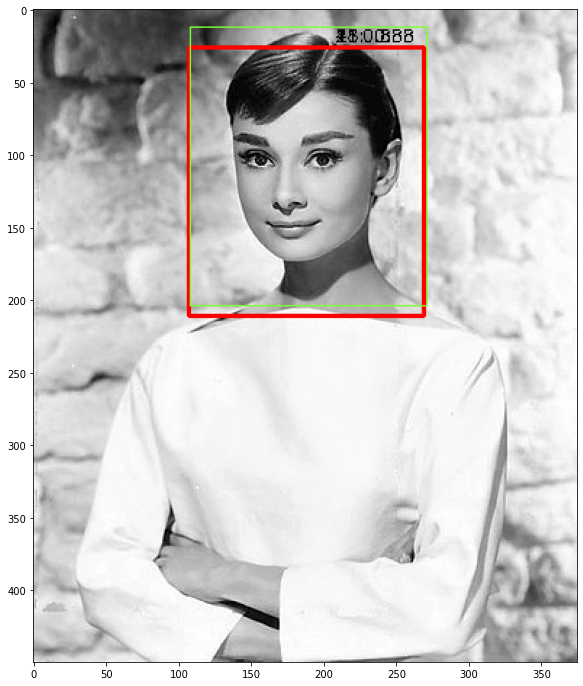

In [20]:
img = cv2.imread('../../data/image/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]

cv2.namedWindow('Select Window')
rect = cv2.selectROI('Select Window', img_rgb, fromCenter=False, showCrosshair=True)
cv2.destroyAllWindows()

left = rect[0]
top = rect[1]
right = left + rect[2]
bottom = top + rect[3]
    
# Ground Truth location
gt_box = [left, top, right, bottom]

img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), (255,0,0), 2)

for index, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1] # [left, top, right, bottom]
    
    iou = compute_iou(cand_box, gt_box)
    
    if iou > 0.7:
        print('index:', index, 'iou:', iou, 'rectangle:', (cand_box[0], cand_box[1], cand_box[2], cand_box[3]))
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
        text = '{}: {:.2f}'.format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=(0,0,0), thickness=1)

plt.figure(figsize=(12,12))
plt.imshow(img_rgb)
plt.show()